In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import joblib

In [5]:
# 1. Load the best model and data
model = joblib.load('../models/best_fraud_model.pkl')
X_test = pd.read_csv('../data/processed/X_test_scaled.csv')

# 2. Extract Feature Importance
importances = model.feature_importances_
feature_names = X_test.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False).head(10)


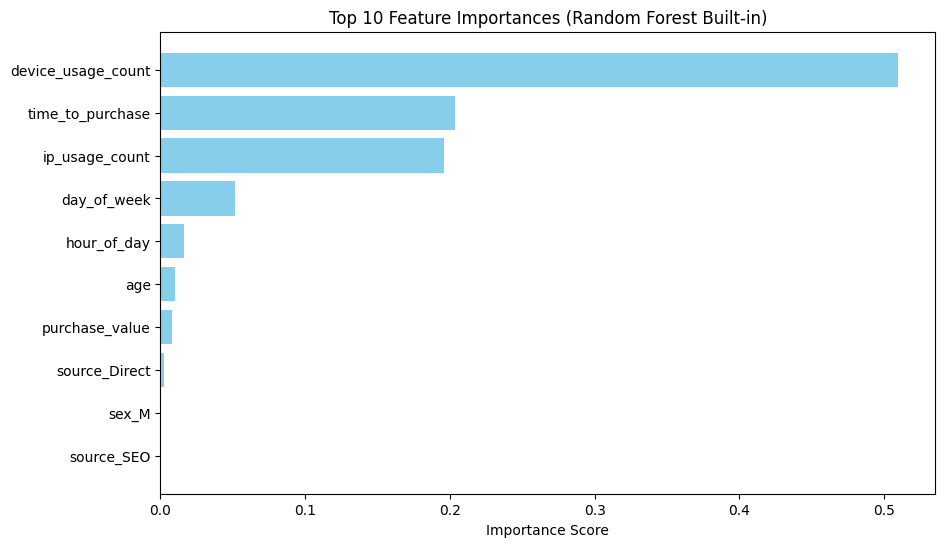

In [6]:
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.gca().invert_yaxis()
plt.title('Top 10 Feature Importances (Random Forest Built-in)')
plt.xlabel('Importance Score')
plt.show()

SHAP shape: (1000, 14)
Data shape: (1000, 14)


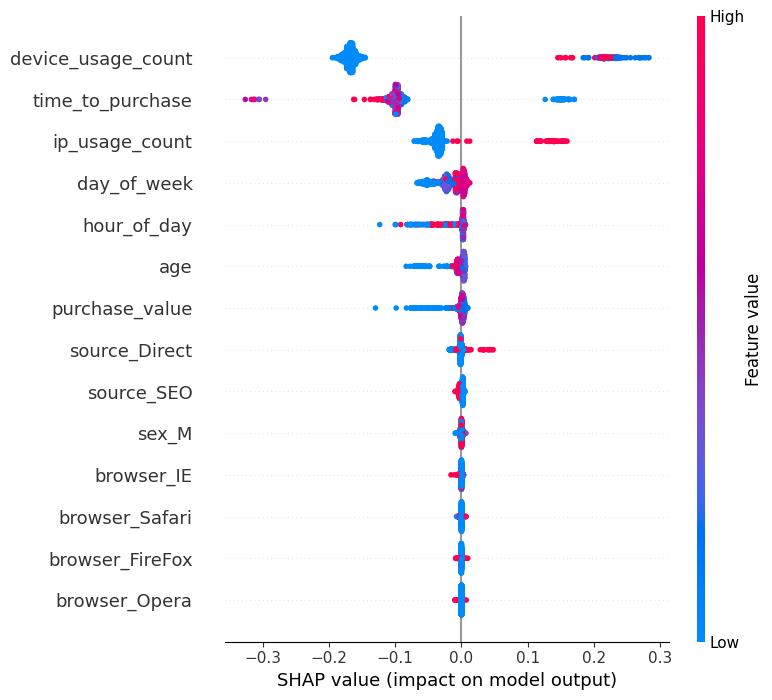

In [ ]:
import shap

shap.initjs()

explainer = shap.TreeExplainer(model)

X_sample = X_test.sample(1000, random_state=42)
shap_values = explainer.shap_values(X_sample)

# Note: In binary classification, shap_values[1] is for the 'Fraud' class
# Check dimensions and handle the SHAP output
if isinstance(shap_values, list):
    shap_to_plot = shap_values[1]
elif len(shap_values.shape) == 3:
    shap_to_plot = shap_values[:, :, 1]
else:
    # Already 2D
    shap_to_plot = shap_values

print(f"SHAP shape: {shap_to_plot.shape}")
print(f"Data shape: {X_sample.shape}")

shap.summary_plot(shap_to_plot, X_sample)

--- Case 1: True Positive (Correctly Identified Fraud) at Index 2 ---


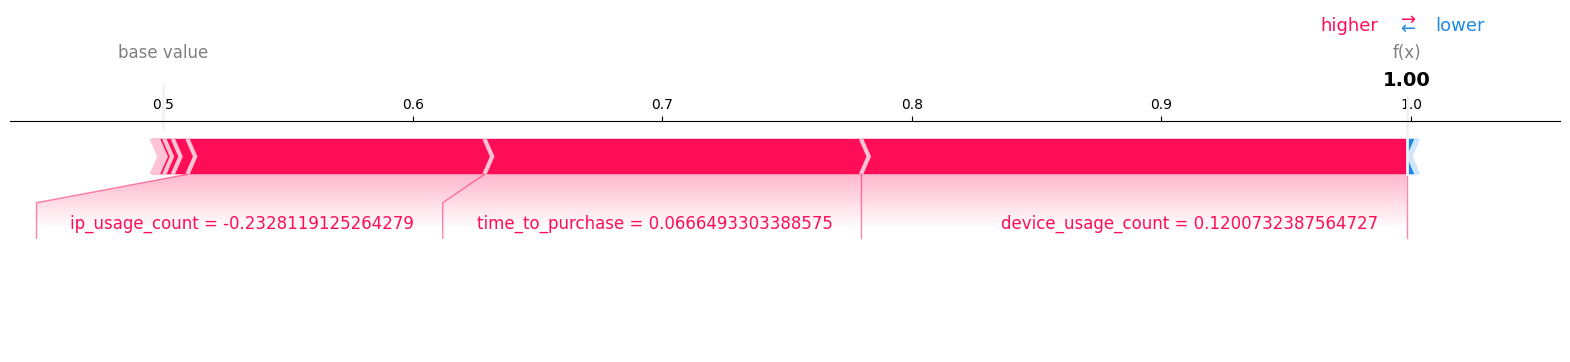

None

--- Case 2: False Positive (False Alarm) at Index 16 ---


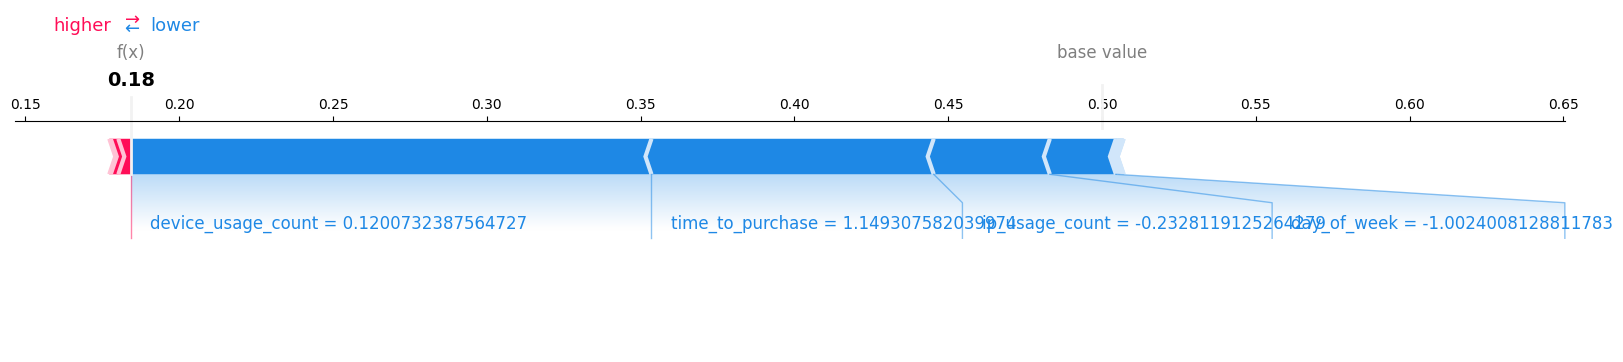

None

--- Case 3: False Negative (Missed Fraud) at Index 17 ---


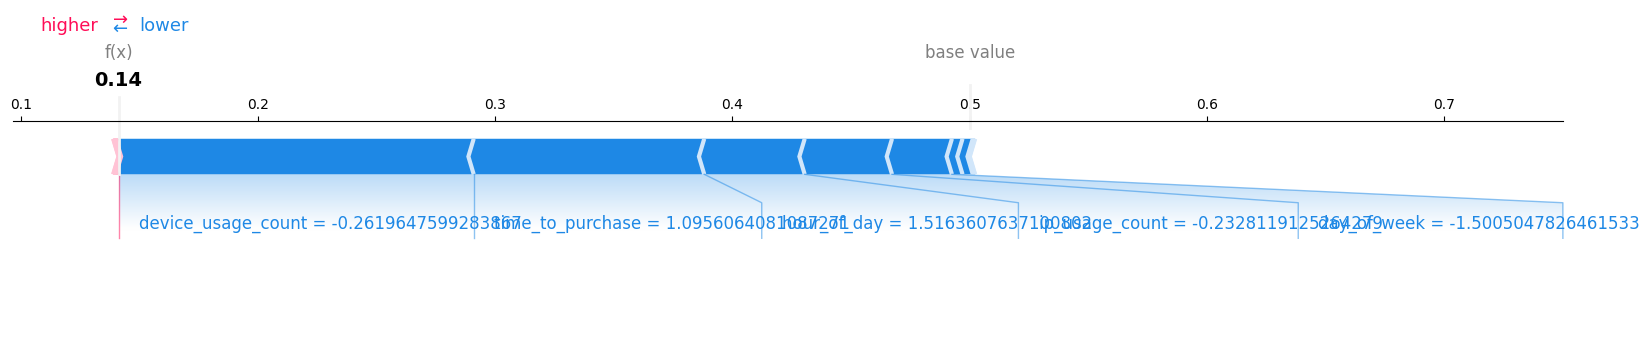

None

In [ ]:
import numpy as np

y_test = pd.read_csv('../data/processed/y_test.csv').values.ravel()
preds = model.predict(X_test)

# Find indices for the 3 required cases

tp_idx = np.where((preds == 1) & (y_test == 1))[0][0] 
fp_idx = np.where((preds == 1) & (y_test == 0))[0][0] 
fn_idx = np.where((preds == 0) & (y_test == 1))[0][0] 

# Generate Force Plots
print(f"--- Case 1: True Positive (Correctly Identified Fraud) at Index {tp_idx} ---")
display(shap.force_plot(explainer.expected_value[1], shap_to_plot[tp_idx], X_test.iloc[tp_idx], matplotlib=True))

print(f"--- Case 2: False Positive (False Alarm) at Index {fp_idx} ---")
display(shap.force_plot(explainer.expected_value[1], shap_to_plot[fp_idx], X_test.iloc[fp_idx], matplotlib=True))

print(f"--- Case 3: False Negative (Missed Fraud) at Index {fn_idx} ---")
display(shap.force_plot(explainer.expected_value[1], shap_to_plot[fn_idx], X_test.iloc[fn_idx], matplotlib=True))